# Introduction

In this lab, we will explore the concept of bias-variance decomposition and how it relates to single estimators versus bagging ensembles. We will use scikit-learn to generate and visualize toy regression problems and compare the expected mean squared error of a single estimator versus a bagging ensemble of decision trees.

# Import Required Libraries

First, we need to import the necessary libraries to generate data, train models, and visualize the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Set the Parameters

We need to set the parameters that control the size of the datasets, the number of iterations, and the standard deviation of the noise.

In [2]:
n_repeat = 50  # Number of iterations for computing expectations
n_train = 50  # Size of the training set
n_test = 1000  # Size of the test set
noise = 0.1  # Standard deviation of the noise
np.random.seed(0)

# Generate Data

We will generate a toy 1d regression problem using a known function, and add random noise to the training and test sets. We will generate multiple training sets to compute the expected mean squared error.

In [3]:
def f(x):
    x = x.ravel()
    return np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2))

def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y

X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

# Define the Models to Compare

We will define two models to compare: a single decision tree and a bagging ensemble of decision trees.

In [4]:
estimators = [
    ("Tree", DecisionTreeRegressor()),
    ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor())),
]
n_estimators = len(estimators)

# Train the Models and Compute the Expected Mean Squared Error

We will loop over the estimators, train them on the multiple training sets, and compute the expected mean squared error by decomposing it into bias, variance, and noise terms. We will also plot the predictions of the models and the bias-variance decomposition.

Tree: 0.0255 (error) = 0.0003 (bias^2)  + 0.0152 (var) + 0.0098 (noise)
Bagging(Tree): 0.0196 (error) = 0.0004 (bias^2)  + 0.0092 (var) + 0.0098 (noise)


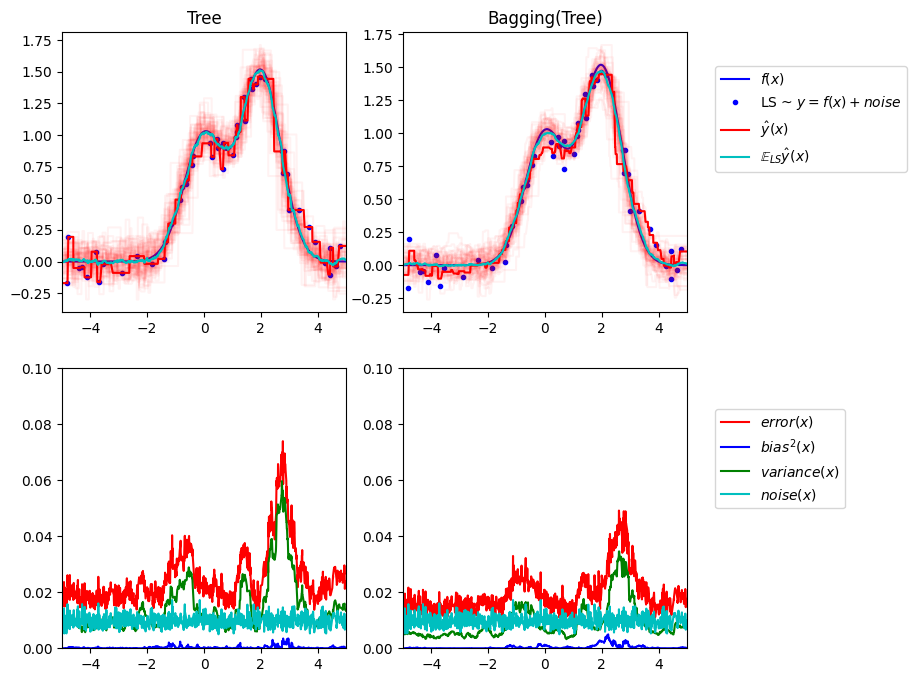

In [5]:
plt.figure(figsize=(10, 8))

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= n_repeat * n_repeat

    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print(
        "{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
        " + {3:.4f} (var) + {4:.4f} (noise)".format(
            name, np.mean(y_error), np.mean(y_bias), np.mean(y_var), np.mean(y_noise)
        )
    )

    # Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c", label=r"$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, 0.5))

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, 0.5))

plt.subplots_adjust(right=0.75)
plt.show()

# Interpret the Results

We can observe the bias-variance decomposition of the expected mean squared error for each model, as well as the predictions of the models. We can also compare the total error of the two models and their tradeoff between bias and variance.

# Summary

In this lab, we explored the concept of bias-variance decomposition and how it relates to single estimators versus bagging ensembles. We generated and visualized toy regression problems using scikit-learn, and compared the expected mean squared error of a single decision tree versus a bagging ensemble of decision trees. We found that the tradeoff between bias and variance is better for bagging, as it slightly increases the bias term but allows for a larger reduction of the variance, resulting in a lower overall mean squared error.